In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
import plotly.express as px
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.linear_model import LinearRegression


# <span style="color:red"> * Read Data<span>

In [42]:
Data = pd.read_csv('stock_market_data.csv')
AMZN = Data[Data['Symbol'] == 'AMZN']
FB = Data[Data['Symbol'] == 'FB']
TSLA = Data[Data['Symbol'] == 'TSLA']
GOOGL = Data[Data['Symbol'] == 'GOOGL']
AAPL = Data[Data['Symbol'] == 'AAPL']

In [93]:
### USER DATABASE ###
user_shares = {}
curr_price = {}
lastest_price = {}
second_to_lastest = {}


# <span style="color:red"> * Shares settings<span>

In [44]:
tlist = [AMZN, FB, TSLA, GOOGL, AAPL]
tickers = ['AMZN', 'FB', 'TSLA', 'GOOGL', 'AAPL']
tp = {'AMZN' : list(AMZN['Open'])[-1], 'FB' : list(FB['Open'])[-1], 'TSLA' : list(TSLA['Open'])[-1], 'GOOGL': list(GOOGL['Open'])[-1], 'AAPL': list(AAPL['Open'])[-1]}

<h3> Welcome to NYSE Stock market, please sign up to continue: </h3>

<h6> please enter your first name and last name: </h6>

In [5]:
name = input()

<h6>please enter your ID number:</h6>

In [11]:
ID = input()

<h6>please enter you birth date in this format(dd/mm/yyyy):</h6>

In [12]:
BD = input()

<h6>please enter your balance in US$:</h6>

In [94]:
Balance = int(input())

<h3>Thanks for your registration, now you have access to trade in Stock market</h3>


# <span style="color:red"> * Stock market portfolio<span>

## To buy shares:

In [134]:
print(f'Your Balance is : {Balance}')
pick = int(input('''to buy shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
for i, j in enumerate(tlist[pick-1]['Date']):
    if j == '2020-03-02':
        curr_price[tickers[pick-1]] = list(tlist[pick-1]['Open'])[i] 
        break
lastest_price[tickers[pick-1]] = list(tlist[pick-1]['Open'])[-1]
second_to_lastest[tickers[pick-1]] = list(tlist[pick-1]['Open'])[-2]
to_buy = int(input(f'{tickers[pick-1]} price is {curr_price[tickers[pick-1]]} per share, how many shares do you want to buy?'))
if(to_buy * curr_price[tickers[pick-1]] > Balance):
    print("Insufficient Balance")
else:
    Balance -= to_buy * curr_price[tickers[pick-1]]
    if tickers[pick-1] in user_shares.keys():
        user_shares[tickers[pick-1]] += to_buy
    else:
        user_shares[tickers[pick-1]] = to_buy
    print(f'You have successfully bought {to_buy} share from {tickers[pick-1]}, your new Balance is: {Balance}$')
        

Your Balance is : 4861.671417236328
You have successfully bought 1 share from GOOGL, your new Balance is: 3510.2814025878906$


## To sell shares:

In [131]:
d = {'Shares': list(user_shares.keys()), 'Quantities': list(user_shares.values())}
df2 = pd.DataFrame(data=d)
ins = list(df2['Quantities'])
df2 = df2.set_index('Quantities')
if 0 in ins:
    df2 = df2.drop(0)
df2 = df2.reset_index()
print(f'Your Shares are listed Below:')
if len(df2):
    print(df2.to_markdown())
pick = int(input('''to sell shares, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if tickers[pick-1] in user_shares.keys() and user_shares[tickers[pick-1]] != 0:   
    to_sell = int(input(f'{tickers[pick-1]} price is {lastest_price[tickers[pick-1]]} per share and you have {user_shares[tickers[pick-1]]} shares, how many shares of yours do you want to sell?'))
    if(to_sell > int(user_shares[tickers[pick-1]])):
        print("Insufficient Shares!")
    else:
        user_shares[tickers[pick-1]] -= to_sell
        Balance += to_sell * lastest_price[tickers[pick-1]]
        print(f'You have successfully sold {to_sell} shares of {tickers[pick-1]}, your new Balance is: {Balance}')
else:
    print(f'You do not have any {tickers[pick-1]} shares in your portfolio!')

Your Shares are listed Below:
|    |   Quantities | Shares   |
|---:|-------------:|:---------|
|  0 |            2 | AMZN     |
|  1 |            1 | FB       |
|  2 |            3 | TSLA     |
|  3 |            9 | AAPL     |
|  4 |            3 | GOOGL    |
You have successfully sold 1 shares of AMZN, your new Balance is: 4861.671417236328


## To check charts:

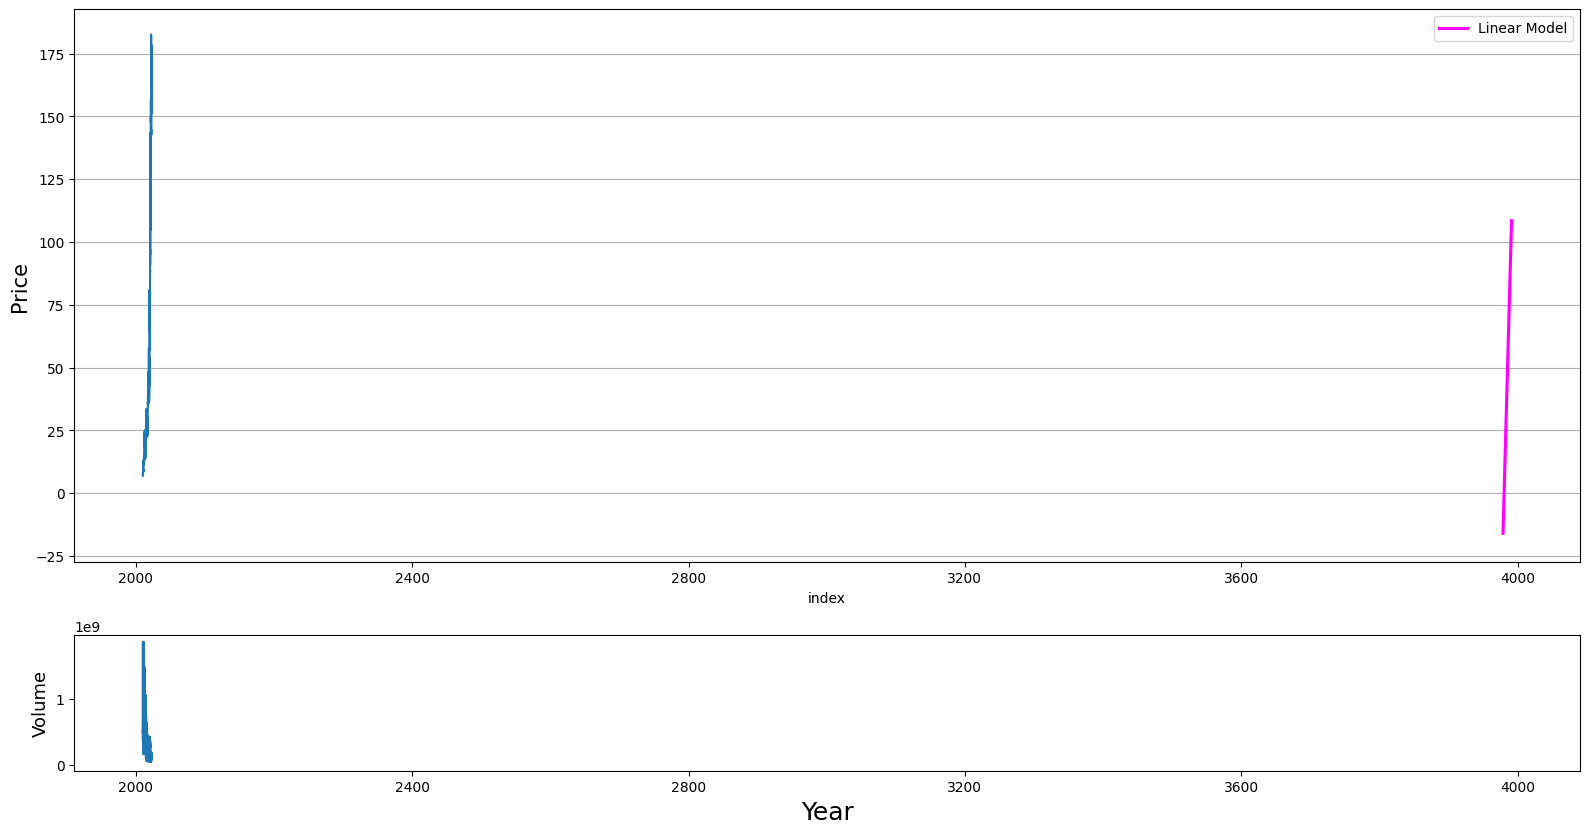

In [30]:
num = int(input('''To check the charts, please enter the ticker's number:
1- AMZN
2- FB
3- TSLA
4- GOOGL
5- AAPL
'''))
if num in range(1,6):
    df = pd.DataFrame()
    df['Open'] = tlist[num-1]['Open']
    df.index = [datetime.strptime(x, "%Y-%m-%d") for x in list(tlist[num-1]['Date'])]
    df.index = df.index.map(pd.Timestamp.toordinal)
    data=df.loc[:].reset_index()    
     
    xax = list(tlist[num-1]['Date'])
    yax = list(tlist[num-1]['Open'])
    vol = list(tlist[num-1]['Volume'])
    xs = [datetime.strptime(x, "%Y-%m-%d") for x in xax]
    plt.figure(figsize=(16, 10))
    plt.subplot2grid((5, 4), (0, 0), rowspan=3, colspan=4)
    plt.plot(xs, yax)
    sns.regplot(data=data, x='index', y='Open',color='magenta', scatter_kws={'s': 7}, label='Linear Model', scatter=False)
    plt.grid(axis='y')
    plt.ylabel('Price', fontsize=15)
    plt.legend()
    plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
    plt.plot(xs, vol)
    sns.regplot(data=data, x='index', y='Open',color='white', scatter_kws={'s': 7}, label='Linear Model', scatter=False)
    plt.ylabel('Volume', fontsize = 13)
    plt.xlabel('Year', fontsize = 18)
    plt.tight_layout()
    plt.show()
else:
    print("Wrong ticker number!")

## To check shares list:

In [124]:
df3 = pd.DataFrame(user_shares.items())
df3.columns = ['Ticker', 'Quantity']
taa = list(df3['Quantity'])
df3['Value in $'] = [tp[i] * user_shares[i] for i in user_shares.keys()]
df3 = df3[df3.Quantity != 0]
print(df3.to_markdown())

|    | Ticker   |   Quantity |   Value in $ |
|---:|:---------|-----------:|-------------:|
|  0 | AMZN     |          1 |      2181.38 |
|  1 | FB       |          1 |       192.58 |
|  2 | TSLA     |          3 |      2320.44 |
|  3 | AAPL     |          9 |      1301.31 |
|  4 | GOOGL    |          2 |      4581.32 |


## To check profit rate:

In [136]:
profit = pd.DataFrame(user_shares.items())
profit.columns = ['Ticker', 'Quantity']
profit['Profit percentage'] = [(lastest_price[i] - curr_price[i]) * 100 /  curr_price[i]  for i in user_shares.keys()]
profit['Profit in US$'] = [lastest_price[i] - curr_price[i]  for i in user_shares.keys()] 
print(profit.to_markdown())

|    | Ticker   |   Quantity |   Profit percentage |   Profit in US$ |
|---:|:---------|-----------:|--------------------:|----------------:|
|  0 | AMZN     |          1 |           14.4186   |         274.89  |
|  1 | FB       |          1 |           -0.747306 |          -1.45  |
|  2 | TSLA     |          3 |          443.739    |         631.228 |
|  3 | AAPL     |          9 |          104.889    |          74.02  |
|  4 | GOOGL    |          4 |           69.504    |         939.27  |


## To check ratio:

In [140]:
ratio = pd.DataFrame(user_shares.items())
ratio.columns = ['Ticker', 'Quantity']
ratio['Ratio % relative to last day'] = [lastest_price[i] * 100 / second_to_lastest[i] for i in user_shares.keys()]
ratio = ratio[ratio.Quantity != 0]
print(ratio.to_markdown())

|    | Ticker   |   Quantity |   Ratio % relative to last day |
|---:|:---------|-----------:|-------------------------------:|
|  0 | AMZN     |          1 |                        106.15  |
|  1 | FB       |          1 |                        102.951 |
|  2 | TSLA     |          3 |                        110.34  |
|  3 | AAPL     |          9 |                        101.275 |
|  4 | GOOGL    |          4 |                        102.833 |
